# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



In [79]:
sdf = pd.read_csv("./datasets/kodex_stock.csv",parse_dates=['dt'])[['dt','close']]
bdf = pd.read_csv("./datasets/kodex_bond10y.csv",parse_dates=['dt'])[['dt','close']]
sdf.head()

,dt,close
0,2012-01-20,49960.0
1,2012-01-25,49960.0
2,2012-01-26,49930.0
3,2012-01-27,50000.0
4,2012-01-30,50130.0


In [3]:
sdf.shape, bdf.shape

((1845, 2), (1845, 2))

In [4]:
sdf.columns

Index(['dt', 'close'], dtype='object')

In [5]:
bdf.columns

Index(['dt', 'close'], dtype='object')

## 주식과 채권은 몇대몇 비율이어야 최대 포트폴리오를 얻는가?

In [6]:
sdf = sdf.set_index('dt')
bdf = bdf.set_index("dt")

In [7]:
# sdf['수익률_chg'] = sdf['close'].pct_change()
# r = sdf['수익률_chg']
# sdf['누적수익률']  =( (1+r).cumprod() - 1 ) *100
# sdf['로그수익률']  = np.log( 1+r) 
# sdf['누적로그수익률']  =  np.log( 1+r).cumsum() *100
# #------------------------------------------------채권
# bdf['수익률_chg'] = bdf['close'].pct_change()
# r = bdf['수익률_chg']
# bdf['누적수익률']  =( (1+r).cumprod() - 1 ) *100
# bdf['로그수익률']  = np.log( 1+r) 
# bdf['누적로그수익률']  =  np.log( 1+r).cumsum() *100

In [11]:
df=pd.concat([sdf,bdf],axis=1)
df

,close,close
dt,,
2012-01-20,49960.0,23197.4
2012-01-25,49960.0,23277.4
2012-01-26,49930.0,23299.6
2012-01-27,50000.0,23335.2
2012-01-30,50130.0,23073.0
...,...,...
2019-07-17,71210.0,27225.0
2019-07-18,71665.0,27165.0
2019-07-19,71770.0,27545.0


In [14]:
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252
stocks = df.columns


In [16]:



port_ret     = [] 
port_risk    = [] 
port_weights = [] 
port_sharp   = [] 


for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 

    #------------------- 수익률, 리스크(편차), 샤프지수 -----------------------
    returns = np.dot(weights, annual_ret)
    risk    = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    sharp   =  returns / risk
    
    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(np.round(weights,2)) 
    port_sharp.append(sharp) 
    
    
port_dic = {'Return': port_ret, 'Risk': port_risk, 'Sharp':port_sharp ,'Weight': port_weights} 
df = pd.DataFrame(port_dic) 
df.head()

,Return,Risk,Sharp,Weight
0,0.041668,0.063526,0.655922,"[0.52, 0.48]"
1,0.046243,0.041972,1.101768,"[0.77, 0.23]"
2,0.049835,0.042473,1.173340,"[0.97, 0.03]"
3,0.041047,0.067416,0.608862,"[0.48, 0.52]"
4,0.039061,0.080603,0.484617,"[0.37, 0.63]"


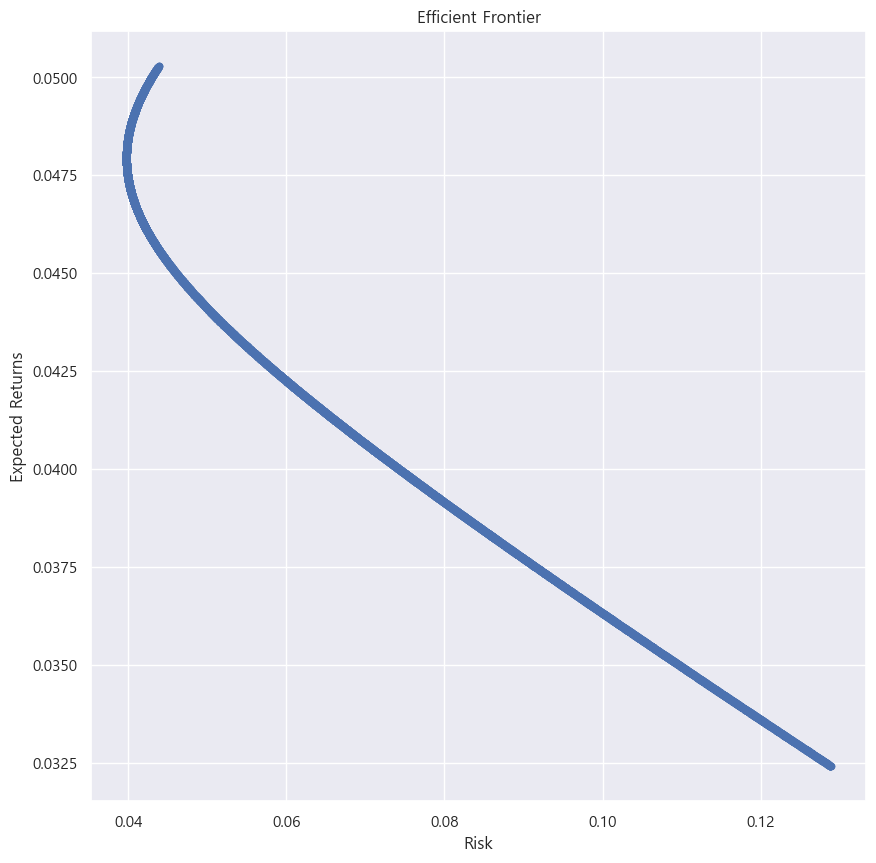

In [17]:
df.plot.scatter(x='Risk', y='Return', figsize=(10,10), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [68]:
sharp_max = df[df['Sharp'] == df['Sharp'].max()]
risk_min  = df[df['Risk'] == df['Risk'].min()]
return_max = df[df['Return'] == df['Return'].max()]




print(f"Expected annual return: {return_max}")
print(f"Annual volatility: {risk_min}")
print(f"Sharpe Ratio: {sharp_max}")

Expected annual return:         Return      Risk     Sharp      Weight
6400  0.050286  0.043851  1.146753  [1.0, 0.0]
Annual volatility:        Return      Risk     Sharp        Weight
331  0.047945  0.039766  1.205688  [0.87, 0.13]
Sharpe Ratio:          Return      Risk     Sharp      Weight
17878  0.048474  0.039985  1.212311  [0.9, 0.1]


In [69]:
return_max

,Return,Risk,Sharp,Weight
6400,0.050286,0.043851,1.146753,"[1.0, 0.0]"


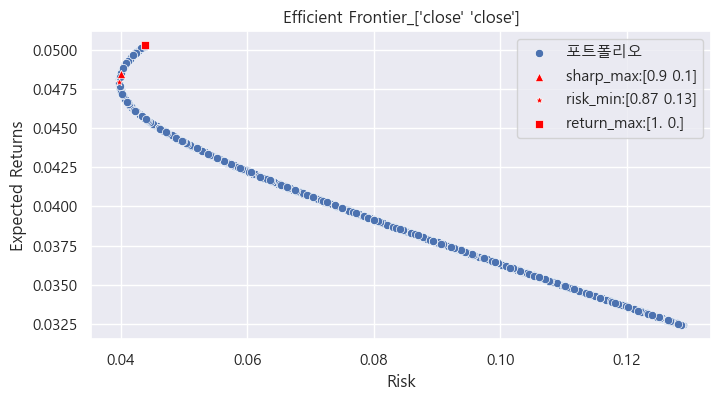

In [77]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df        , x='Risk', y='Return'                     , label=f"포트폴리오")
sns.scatterplot(data=sharp_max , x='Risk', y='Return', marker="^", c='red', label=f"sharp_max:{sharp_max.iloc[:,3].values[0]}")
sns.scatterplot(data=risk_min  , x='Risk', y='Return', marker="*", c='red', label=f"risk_min:{risk_min.iloc[:,3].values[0]}")
sns.scatterplot(data=return_max, x='Risk', y='Return', marker="s", c='red', label=f"return_max:{return_max.iloc[:,3].values[0]}")


plt.title(f'Efficient Frontier_{stocks.values}') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 